In [ ]:
import pandas as pd
import numpy as np

np.random.seed(123)
countries = 100
corpuslen = 10000

# Load the dataset
url = 'countries.csv'
df = pd.read_csv(url)
words = df['COUNTRY'].str.lower()

In [8]:
import gensim.downloader as api

# Load Word2Vec
wv = api.load('glove-wiki-gigaword-300')
tokens = np.random.choice(np.array([tok for tok in words if tok in wv]), countries, replace=False)

# embeddings = np.array([wv[tok] for tok in tokens])
corpus_embeddings = wv[np.random.choice(wv.index_to_key, corpuslen, replace=False)]
target_embeddings = wv[tokens]

In [9]:
def compute_distance_matrix(p, q):
    p = p[:, None, :]  # Shape (n_p, 1, d_p)
    q = q[None, :, :]  # Shape (1, n_q, d_q)
    dist_matrix = np.linalg.norm(p - q, axis=2)
    return dist_matrix


In [10]:
from somu import som
from sphereplot import scatter_sphere, fibonacci_sphere

def plot_som(background_embeddings, target_embeddings, iters=1000, sigma_initial=0.15, seed=1):
    units = fibonacci_sphere(countries)
    centroids = som(background_embeddings, units, iters=iters, sigma_initial=sigma_initial, seed=seed, batch_size=3000)


    nearest_word_indices = np.argmin(compute_distance_matrix(centroids, target_embeddings), axis=1)
    matched_tokens = tokens[nearest_word_indices]

    scatter_sphere(units, matched_tokens)

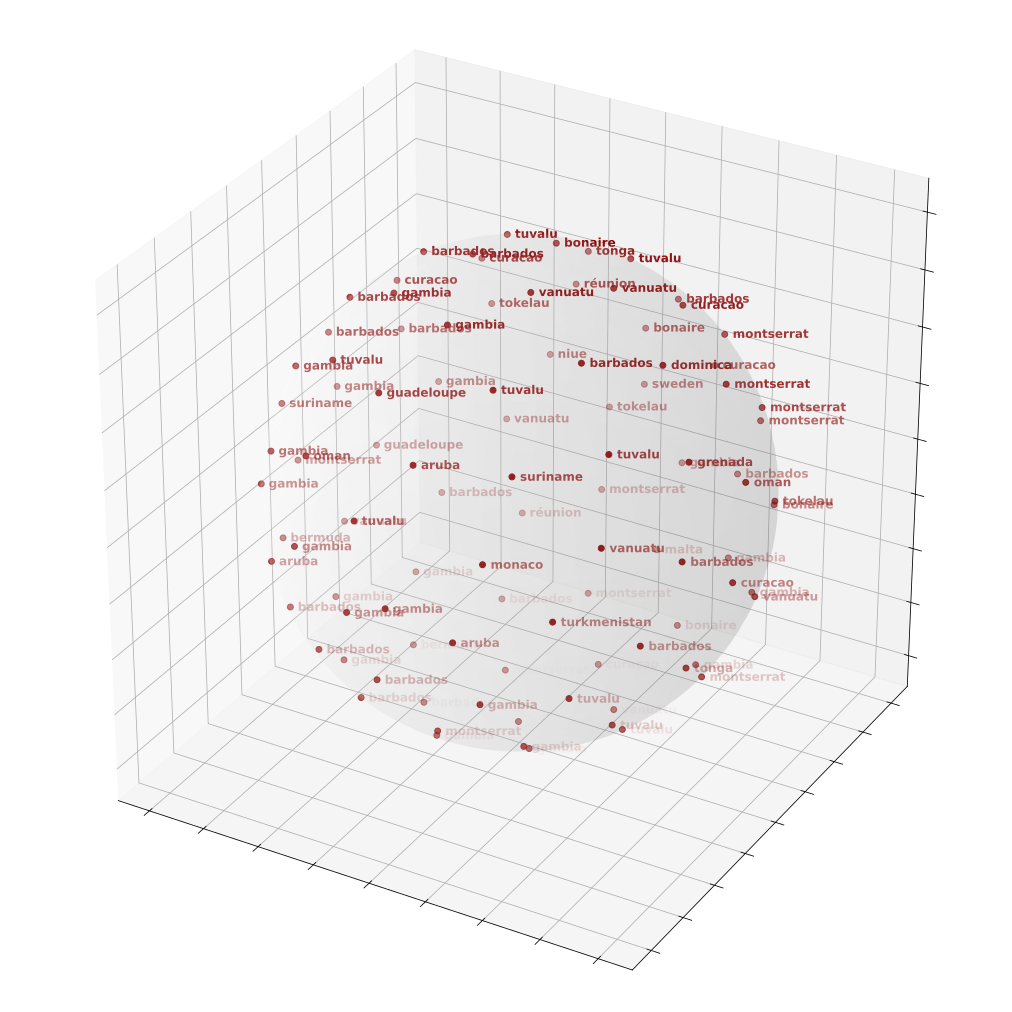

In [11]:
plot_som(corpus_embeddings, target_embeddings, iters=1000, sigma_initial=0.00001, seed=1)

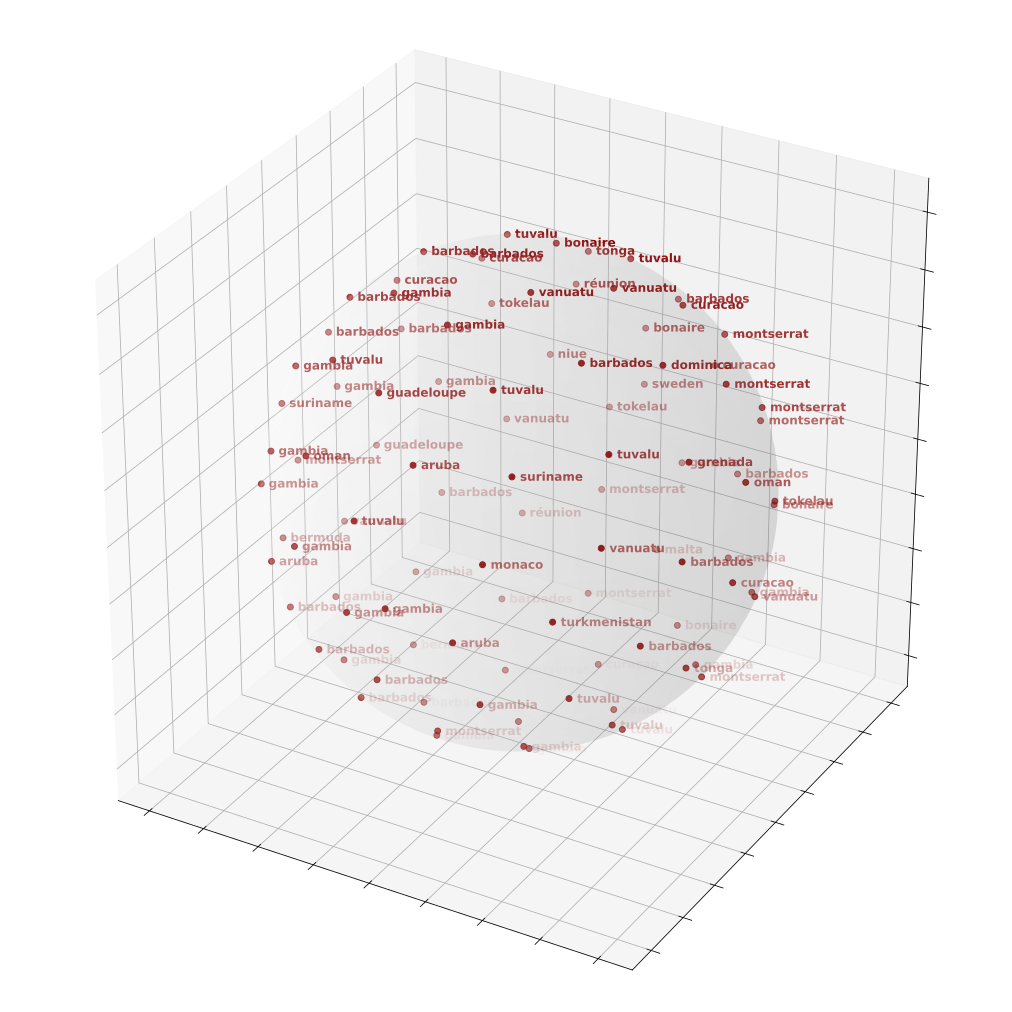

In [18]:
plot_som(corpus_embeddings, target_embeddings, iters=10000, sigma_initial=0.01, seed=1)